# Regression with MCMC : Optimizing profits on bike rents

### Exploring the dataset

Markov Chain Monte Carlo, or MCMC, combines the concepts of Monte Carlo sampling with Markov Chains' property of converging to a steady state. This allows sampling draws from any, even unknown, posterior distribution. We will be using this method to predict the optimized temperature for bike rent.


We will try to predict the number of bikes rented per day in a bike-sharing system to solve this optimization problem. Let us explore the dataset first.

In [1]:
import pandas as pd
bikes = pd.read_csv("dataset/bikes_test.csv")
bikes.head()


,work_day,temp,humidity,wind_speed,num_bikes
0,0,0.265833,0.687917,0.175996,2.947
1,1,0.282609,0.622174,0.153800,3.784
2,1,0.354167,0.496250,0.147379,4.375
3,1,0.256667,0.722917,0.133721,2.802
4,1,0.265000,0.562083,0.194037,3.830


We will first separate our training and testing data

In [2]:
# Select the last 5 rows for bikes_test
bikes_test = bikes.iloc[-5:]

# Select the rest of the rows for bikes_train
bikes_train = bikes.iloc[:-5]

### Generate regression models


We will first create a model with `temp` and `work_day` as independent variables and generate a sample distribution


In [3]:
import pymc3 as pm
formula = "num_bikes ~ temp + work_day"

with pm.Model() as model_1:
    # pm.GLM.from_formula(formula, data=bikes)
    # trace_1 = pm.sample(draws=1000, tune=500)
    pm.GLM.from_formula(formula, data=bikes_train, family=pm.glm.families.Normal())

    # Increase the number of tuning steps and draw more samples
    trace_1 = pm.sample(draws=1000, tune=10000, target_accept=0.99,  return_inferencedata=True)

The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, work_day, temp, Intercept]


Sampling 4 chains for 10_000 tune and 1_000 draw iterations (40_000 + 4_000 draws total) took 621 seconds.
The number of effective samples is smaller than 10% for some parameters.


Let us now visualize the traceplot of this distribution


C:\Users\88016\AppData\Local\Temp/ipykernel_37456/1118348562.py:6: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_1)


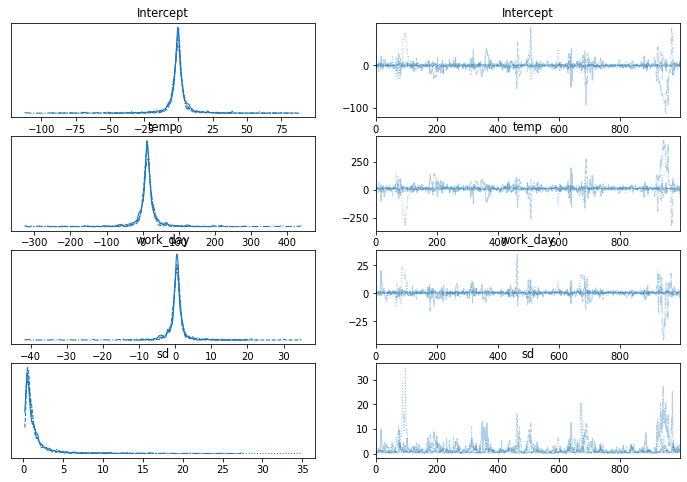

In [4]:
# Import pymc3
import pymc3 as pm
import matplotlib.pyplot as plt

# Draw a trace plot of trace_1
pm.traceplot(trace_1)
plt.show()


We see that , the 4 parameters converges. Now let us also see the forestplot


C:\Users\88016\AppData\Local\Temp/ipykernel_37456/3723906312.py:2: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace_1)


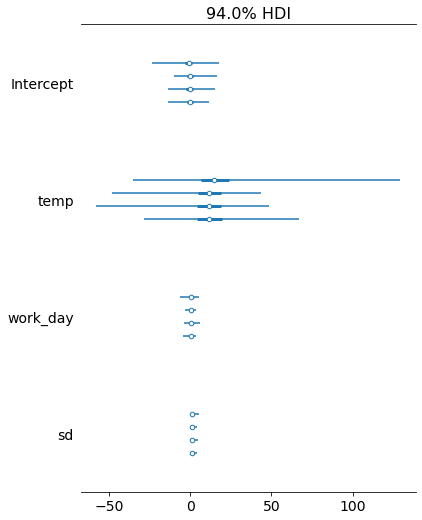

In [5]:

# Draw a forest plot of trace_1
pm.forestplot(trace_1)
plt.show()

We will now see the summary of the trace.


In [6]:
pm.summary(trace_1)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.576,10.723,-16.039,15.415,0.585,0.651,737.0,271.0,1.01
temp,13.026,41.382,-39.403,71.107,2.372,2.382,711.0,290.0,1.01
work_day,0.471,3.368,-4.529,4.824,0.142,0.141,992.0,447.0,1.01
sd,1.611,2.384,0.162,4.530,0.180,0.127,264.0,233.0,1.01


All parameter has r_hat of 1.0 which shows that there is no issue in convergence. We will create another model with `temp`, `work_day` and  `wind_speed` as independent variables and generate another sample distribution


In [7]:
formula = "num_bikes ~ temp + work_day + wind_speed"

with pm.Model() as model_2:
    # pm.GLM.from_formula(formula, data=bikes)
    # trace_2 = pm.sample(draws=1000, tune=1000)
    pm.GLM.from_formula(formula, data=bikes_train, family=pm.glm.families.Normal())

    # Increase the number of tuning steps and draw more samples
    trace_2 = pm.sample(draws=1000, tune=10000, target_accept=0.99,  return_inferencedata=True)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, wind_speed, work_day, temp, Intercept]


Sampling 4 chains for 10_000 tune and 1_000 draw iterations (40_000 + 4_000 draws total) took 1441 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 24 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9602362554344013, but should be close to 0.99. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9647829778684183, but should be close to 0.99. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.0

Let us also visualize the traceplot for this new model.


C:\Users\88016\AppData\Local\Temp/ipykernel_37456/765076770.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_2)


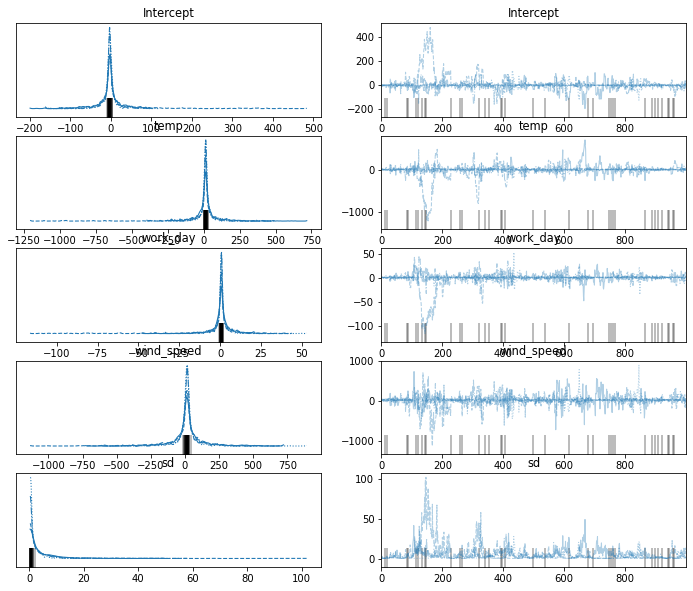

In [8]:

# Draw a trace plot of trace_2
pm.traceplot(trace_2)
plt.show()

We will also be seeing the forest plot of the trace parameters


C:\Users\88016\AppData\Local\Temp/ipykernel_37456/1100666864.py:2: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace_2)


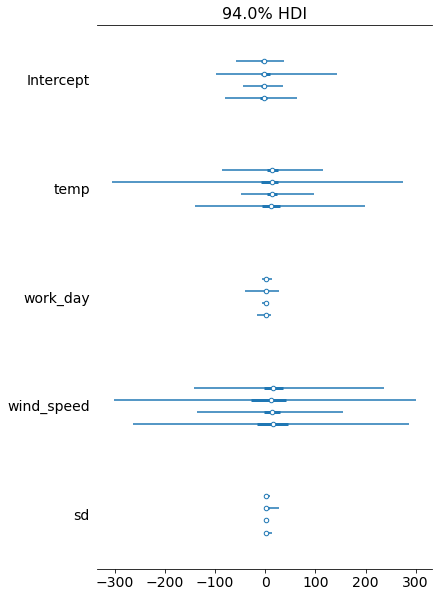

In [9]:

# Draw a forest plot of trace_2
pm.forestplot(trace_2)
plt.show()

And we will also see the summary


In [10]:
pm.summary(trace_2)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.509,44.773,-65.645,75.937,4.740,3.362,305.0,49.0,1.06
temp,4.818,113.922,-137.008,174.485,8.552,7.111,547.0,85.0,1.07
work_day,-0.230,11.179,-13.300,15.011,1.133,0.833,440.0,113.0,1.05
wind_speed,11.052,119.841,-213.087,262.108,4.607,5.928,912.0,233.0,1.05
sd,4.166,7.435,0.181,13.755,0.971,0.690,52.0,115.0,1.07


### Comparing models to find the better model


Now that we have successfully built the two models, we will see if the addition of new variable `wind_speed` is a great predictor of the numbers of bikes rented! Our basic assumption is cycling against the wind is not that much fun. Let us compare and see if our new `model_2` is better than `model_1`, the one without wind speed? We will be using Widely Applicable Information Criterion, or WAIC, to find out!

In [11]:
# Gather trace_1 and trace_2 into a dictionary
traces_dict = {"trace_1" : trace_1, "trace_2" : trace_2}


# Create a comparison table based on WAIC
comparison = pm.compare(traces_dict, ic="waic", scale="deviance")

print(comparison)


         rank       waic    p_waic     d_waic  weight        se       dse  \
trace_1     0  19.176853  4.508159   0.000000     1.0  1.186861  0.000000   
trace_2     1  30.773215  9.306602  11.596362     0.0  1.221426  0.595741   

         warning waic_scale  
trace_1     True   deviance  
trace_2     True   deviance  


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\arviz\stats\stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\arviz\stats\stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


From this comparison, we can arrive at some statements:
- Based only on the WAIC value, model_1 is better than model_2.
- Based on `weight`, we also see that model 1 is better

Let us also visualize this with compareplot

C:\Users\88016\AppData\Local\Temp/ipykernel_37456/3660846548.py:2: DeprecationWarning: The function `compareplot` from PyMC3 is an alias for `plot_compare` from ArviZ. It also applies some kwarg replacements. Nevertheless, please switch to `pymc3.plot_compare` or `arviz.plot_compare`.
  pm.compareplot(comparison, textsize=20)


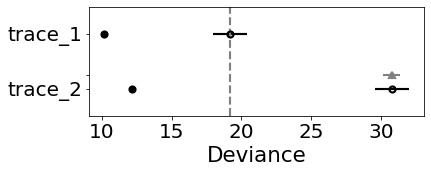

In [12]:

# Draw a comparison plot
pm.compareplot(comparison, textsize=20)
plt.show()

### Sampling from predictive density and Estimating test error


Now, We will be using our best model to make predictions!

A couple of new observations, not seen by the model, have been collected in a DataFrame named bikes_test. For each of them, we know the true number of bikes rented, which will allow us to evaluate model performance. We will work with the test data and generate predictive draws for every test observation.

In [13]:
# Print bikes_test head
print(bikes_test.head())


   work_day      temp  humidity  wind_speed  num_bikes
5         1  0.280833  0.540000    0.116929      3.831
6         0  0.224167  0.731250    0.289796      2.169
7         0  0.127500  0.464583    0.409212      1.529
8         1  0.222500  0.411250    0.167283      3.422
9         1  0.319167  0.508750    0.141179      3.922


Now let us first compute the predictive posterior


In [14]:

# Define the formula
formula = "num_bikes ~ temp + work_day + wind_speed"

# Generate predictive draws
with pm.Model() as model:
    pm.GLM.from_formula(formula, data=bikes_test)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_2)


The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/


Now that we have our posterior_predictive , we can evaluate model performance on new data. To do this, we will need to loop over the test observations, and for each of them, compute the prediction error as the difference between the predictive distribution for this observation and the actual, true value. 

In [15]:
posterior_predictive["y"]


array([[ 4.14749627, -0.69523378, -2.45476054,  0.99489352,  4.03791826],
       [ 2.62563358,  0.94205486, -2.46915023,  1.605971  ,  4.04791977],
       [-0.67789887,  1.79061868,  7.92033768,  0.84061046,  0.43365811],
       ...,
       [ 2.96024683,  6.43891474,  5.37697428,  2.88234263,  2.46667749],
       [ 3.04556912, -1.67659649, -5.60852068,  2.3614626 ,  1.97170757],
       [ 3.87152527,  5.74845704,  1.5486112 ,  3.61598506,  3.8239251 ]])

In [16]:
import numpy as np
# Initialize errors
bikes_test= bikes_train
errors = []

# Iterate over rows of bikes_test to compute error per row
for index, test_example in bikes_test.iterrows():
    error = posterior_predictive["y"][:, index] - test_example["num_bikes"]
    errors.append(error)

# See shape of error data
print(np.array(errors).shape)


(5, 4000)


Let us now reshape them into one single array and visualize the error distribution to understand the range of error with respect to credible interval.


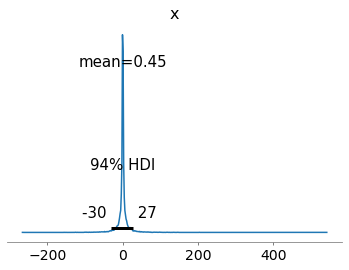

In [17]:

# Reshape errors
error_distribution = np.array(errors).reshape(-1) # Flatten into 1 array

# Plot the error distribution
pm.plot_posterior(error_distribution) # Visualize error distribution
plt.show()

### Fitting and Inspecting the model


We can use a linear regression model to estimate the avocado price elasticity. The regression formula should be:
num_bikes ~ temp + work_day + wind_speed
`num_bikes ~ N (beta_0 + beta_1 * temp + beta_2 * work_day, std)`

Here,  `beta_1` will be the temparature elasticity, that is the impact of temperature on number of bikes rented. We expect it to be negative: the higher the temperature, the lower the bikes rented, that's the case for most people who wants a comfortable ride. To incorporate this prior knowledge into the model, we decide to use a normal distribution with mean -.25 as the prior for temperature. On the other hand, for work_day it can be considered positive. Let us use a normal distribution with mean +5 as the prior for work_day

In [18]:

# Define the formula
formula = "num_bikes ~ temp + work_day"

# Generate predictive draws
with pm.Model() as model:
    priors = {"temp":pm.Normal.dist(mu=-.25), "work_day":pm.Normal.dist(mu=5)}
    pm.GLM.from_formula(formula, data=bikes_train, priors=priors)
    trace = pm.sample(draws=1000, tune=10000, target_accept=0.99,  return_inferencedata=True)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, work_day, temp, Intercept]


Sampling 4 chains for 10_000 tune and 1_000 draw iterations (40_000 + 4_000 draws total) took 134 seconds.


We will now inspect the posterior draws to see if there are any convergence issues. Let's take a look at the parameter draws! 


C:\Users\88016\AppData\Local\Temp/ipykernel_37456/3453507479.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


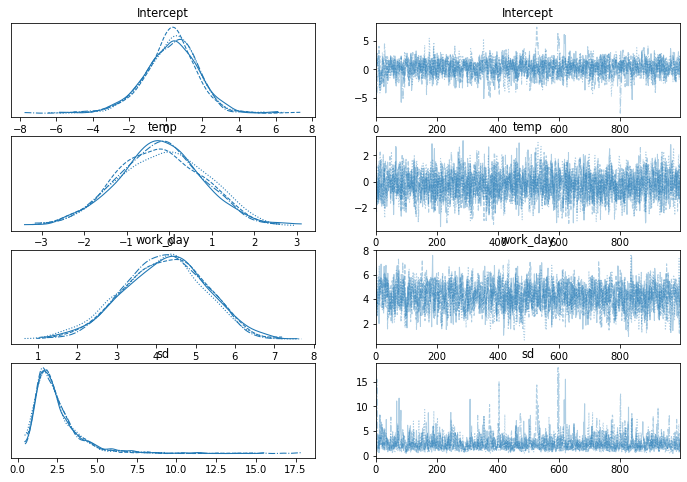

In [19]:
# Draw a trace plot of trace
pm.traceplot(trace)
plt.show()


Let us also see the numeric summary of the trace of this final model


In [20]:

print(*trace)
print(*trace["posterior"])
pm.summary(trace)


posterior log_likelihood sample_stats observed_data
Intercept temp work_day sd


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.281,1.452,-2.419,2.950,0.039,0.029,1466.0,1690.0,1.0
temp,-0.200,1.020,-2.047,1.769,0.022,0.017,2180.0,2348.0,1.0
work_day,4.199,1.049,2.239,6.133,0.028,0.020,1388.0,2111.0,1.0
sd,2.448,1.526,0.590,4.854,0.041,0.029,1313.0,1780.0,1.0


Next, we will extract each model parameter from the trace and summarize it with its posterior mean. We will use these posterior means when we will be making predictions with the model in optimization result finding process.


In [21]:
# Get each parameter's posterior mean
intercept_mean = np.mean(trace["posterior"]["Intercept"])
temp_mean = np.mean(trace["posterior"]["temp"]) 
work_day_mean = np.mean(trace["posterior"]["work_day"]) 
# wind_speed_mean = np.mean(trace["posterior"]["wind_speed"]) 
sd_mean = np.mean(trace["posterior"]["sd"]) 